# Understand Scientific Workloads in Sage
This Python notebook shows how to pull data from Sage for workloads that are being run on Sage nodes.

In [17]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sage_data_client import query
from scipy.integrate import simps

import utils

In [18]:
vsn = "W0B1"
# This is the time we enabled collecting tegrastats every second
# Before, it was every 10 seconds
# This is the start and end time for the wildfire workload
# start = "2025-03-27T03:00:00Z"
# end = "2025-03-27T12:59:59Z"

start = "2025-03-27T18:30:00Z"
end = "2025-03-27T22:59:59Z"


# The workload name can be found in
# https://portal.sagecontinuum.org/jobs/all-jobs?job=2376
# workload_name = "wildfire-smoke-w0b1node"
target_device = "core"
workload_name = "cloud-cover-core"


# workload_name = "wildfire-smoke-core"
# target_device = "core"

# workload_name = "wildfire-smoke-rpi"
# target_device = "rpi"

In [19]:
all_workloads= utils.fill_completion_failure(
    utils.parse_events(
        utils.get_data(
            "W0B1",
            start=start,
            end=end)))

/home/theone/repo/edge_resource_analysis/simulation/kubernetes/notebook/utils.py:58: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(json.dumps(v))


In [20]:
all_workloads["plugin_name"].unique()

array(['cloud-cover-core', 'wildfire-smoke-w0b1node',
       'avian-diversity-w0b1node', 'motion-detection-w0b1-with-gpu',
       'motion-analysis-w0b1node', 'traffic-state-w0b1node',
       'cloud-cover-w0b1node'], dtype=object)

In [21]:
workloads = all_workloads[all_workloads["plugin_name"] == workload_name]
workloads = workloads[workloads["end_state"] == "completed"]

In [22]:
workloads.head()

,goal_id,k3s_pod_instance,k3s_pod_name,k3s_pod_node_name,k3s_pod_status,k3s_pod_uid,plugin_args,plugin_image,plugin_name,plugin_selector,...,vsn,event,message,reason,error_log,return_code,completed_at,execution_time,end_state,failed_at
2899,46bf3533-0f63-42f3-4c96-52966a00df9c,cloud-cover-core-QImQGQ,cloud-cover-core-2861,000048b02dd3c5e0.ws-nxcore,Pending,0f009065-f131-459e-9ed3-6ad0e500da4f,-stream top_camera,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-core,"{""zone"":""core""}",...,W0B1,sys.scheduler.status.plugin.launched,NaN,NaN,NaN,NaN,2025-03-27 18:31:41.338550228+00:00,98.249284,completed,NaT
2914,46bf3533-0f63-42f3-4c96-52966a00df9c,cloud-cover-core-KpUCOv,cloud-cover-core-2861,000048b02dd3c5e0.ws-nxcore,Pending,bfb4ecfa-d4b5-4424-a7c1-e6fca7c85f71,-stream top_camera,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-core,"{""zone"":""core""}",...,W0B1,sys.scheduler.status.plugin.launched,NaN,NaN,NaN,NaN,2025-03-27 18:41:42.447954364+00:00,99.399158,completed,NaT
2931,46bf3533-0f63-42f3-4c96-52966a00df9c,cloud-cover-core-OJWQzg,cloud-cover-core-2861,000048b02dd3c5e0.ws-nxcore,Pending,4a445de2-f73d-4371-bf38-23f4053fdd6e,-stream top_camera,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-core,"{""zone"":""core""}",...,W0B1,sys.scheduler.status.plugin.launched,NaN,NaN,NaN,NaN,2025-03-27 18:51:39.361465209+00:00,96.244606,completed,NaT
2946,46bf3533-0f63-42f3-4c96-52966a00df9c,cloud-cover-core-aR0jRn,cloud-cover-core-2861,000048b02dd3c5e0.ws-nxcore,Pending,6f98ac4d-6abd-4a42-b376-6c2e32a493c1,-stream top_camera,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-core,"{""zone"":""core""}",...,W0B1,sys.scheduler.status.plugin.launched,NaN,NaN,NaN,NaN,2025-03-27 19:01:38.260846800+00:00,95.184326,completed,NaT
2963,46bf3533-0f63-42f3-4c96-52966a00df9c,cloud-cover-core-xMOMbF,cloud-cover-core-2861,000048b02dd3c5e0.ws-nxcore,Pending,f8a02d9f-d19f-47a0-90f4-6a6940d0e4f9,-stream top_camera,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-core,"{""zone"":""core""}",...,W0B1,sys.scheduler.status.plugin.launched,NaN,NaN,NaN,NaN,2025-03-27 19:11:38.251078422+00:00,95.187258,completed,NaT


## Overview of the Wildfire Workload

In [23]:
print(f'Node: {vsn}')
print(f'Time window: {start} - {end}')
print(f'Number of successful execution: {len(workloads)}')
print(f'Averaged execution time: {workloads["execution_time"].mean():.2f} seconds')
print(f'Devices used to run the workload: {workloads["k3s_pod_node_name"].unique()}')

Node: W0B1
Time window: 2025-03-27T18:30:00Z - 2025-03-27T22:59:59Z
Number of successful execution: 20
Averaged execution time: 96.15 seconds
Devices used to run the workload: ['000048b02dd3c5e0.ws-nxcore']


## Pull Node Performance Data from the Sage

In [24]:
# Load the RPi stats if the target device is an RPi
if target_device == "rpi":
    rpistats = pd.read_csv("data/rpistats.csv")
    rpistats["timestamp"] = pd.to_datetime(rpistats["timestamp"]*1e9, utc=True)

def get_rpistats(start, end):
    out = rpistats[(rpistats["timestamp"] >= start - pd.Timedelta(2, unit="s")) & (rpistats["timestamp"] <= end)]
    out["power_app"] = out["rpi_power"] - out["rpi_power"].min()
    return out

In [25]:
def get_nxstats(start, end, device_name):
    out = utils.get_node_performance_data(
        vsn=vsn,
        metric="tegra_wattage_current_milliwatts",
        start=(start - pd.Timedelta(2, unit="s")).strftime("%Y-%m-%dT%H:%M:%SZ"),
        end=end.strftime("%Y-%m-%dT%H:%M:%SZ")
    )
    if out.empty:
        return out
    out["value"] = out["value"] / 1000 # to watts
    out = out[out["meta.hostname"].str.contains(device_name)]
    out_vdd_in = out[out["meta.sensor"] == "vdd_in"]
    print(f"Found {len(out)} records for 'vdd_in' in {start} - {end}")
    out_vdd_in["power_app"] = out_vdd_in["value"] - out_vdd_in["value"].min()
    return out_vdd_in

In [26]:
def calculate_energy(df, name):
    if name not in df.columns:
        raise Exception(f"Column '{name}' not found in the dataframe {df.columns}")
    time_deltas = (df["timestamp"] - df["timestamp"].min()).dt.total_seconds()
    if len(df[name]) != time_deltas.shape[0]:
        raise Exception(f"Length of {len(df[name])} and time_deltas {time_deltas.shape[0]} are not the same")
    integral = simps(df[name], time_deltas.to_list())
    return integral, time_deltas.iloc[-1]

In [27]:
print(f"Workload: {workload_name}")
energy_list = []
for _, instance in workloads.iterrows():
    start = instance["timestamp"]
    end = instance["completed_at"]
    if target_device == "rpi":
        stat_df = get_rpistats(start, end)
    else:
        stat_df = get_nxstats(start, end, target_device)

    if stat_df.empty:
        print(f"Skipping {instance['k3s_pod_instance']} as no data found")
        continue
    energy_j, execution_time = calculate_energy(stat_df, "power_app")

    if energy_j < 0:
        print(f"Skipping {instance['k3s_pod_instance']} {start} - {end} as negative energy found")
        continue
    energy_list.append(energy_j)
    time.sleep(0.2)
    # print(f"  Energy consumption ({instance['k3s_pod_instance']}): {energy_j:.2f} J ({energy_j / 3600:.2f} Wh) over {execution_time} seconds")
energy_df = pd.DataFrame(energy_list, columns=["energy_j"])

Workload: cloud-cover-core
Found 300 records for 'vdd_in' in 2025-03-27 18:30:03.089266220+00:00 - 2025-03-27 18:31:41.338550228+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 303 records for 'vdd_in' in 2025-03-27 18:40:03.048796085+00:00 - 2025-03-27 18:41:42.447954364+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 294 records for 'vdd_in' in 2025-03-27 18:50:03.116859004+00:00 - 2025-03-27 18:51:39.361465209+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 291 records for 'vdd_in' in 2025-03-27 19:00:03.076520349+00:00 - 2025-03-27 19:01:38.260846800+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 291 records for 'vdd_in' in 2025-03-27 19:10:03.063819930+00:00 - 2025-03-27 19:11:38.251078422+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 294 records for 'vdd_in' in 2025-03-27 19:20:03.074424741+00:00 - 2025-03-27 19:21:39.261296473+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 291 records for 'vdd_in' in 2025-03-27 19:30:03.086551406+00:00 - 2025-03-27 19:31:38.290141396+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 288 records for 'vdd_in' in 2025-03-27 19:40:03.075172391+00:00 - 2025-03-27 19:41:37.326250346+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 294 records for 'vdd_in' in 2025-03-27 19:50:03.085940034+00:00 - 2025-03-27 19:51:39.200911823+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 291 records for 'vdd_in' in 2025-03-27 20:00:03.090302942+00:00 - 2025-03-27 20:01:38.113668711+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 297 records for 'vdd_in' in 2025-03-27 20:10:03.064894947+00:00 - 2025-03-27 20:11:40.075436249+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 285 records for 'vdd_in' in 2025-03-27 20:20:23.052106911+00:00 - 2025-03-27 20:21:56.246541036+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 294 records for 'vdd_in' in 2025-03-27 20:30:03.044844646+00:00 - 2025-03-27 20:31:39.110675558+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 297 records for 'vdd_in' in 2025-03-27 20:40:03.055299195+00:00 - 2025-03-27 20:41:40.190002732+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 300 records for 'vdd_in' in 2025-03-27 20:50:03.072584689+00:00 - 2025-03-27 20:51:41.231505976+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 288 records for 'vdd_in' in 2025-03-27 21:00:03.049437844+00:00 - 2025-03-27 21:01:37.007776925+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 297 records for 'vdd_in' in 2025-03-27 21:10:03.101953823+00:00 - 2025-03-27 21:11:40.962978049+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 288 records for 'vdd_in' in 2025-03-27 21:20:03.073916569+00:00 - 2025-03-27 21:21:37.965831228+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 291 records for 'vdd_in' in 2025-03-27 21:30:03.094555921+00:00 - 2025-03-27 21:31:38.905879079+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


Found 297 records for 'vdd_in' in 2025-03-27 21:40:03.085982035+00:00 - 2025-03-27 21:41:40.960542430+00:00


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


In [28]:
energy_df.describe()

,energy_j
count,20.000000
mean,65.930020
std,16.755908
min,37.426446
25%,54.166884
50%,64.088656
75%,79.986620
max,97.858774


In [29]:
# This has records leading to negative energy consumption
# 2025-03-27 07:20:04.666907162+00:00 - 2025-03-27 07:20:40.406656623+00:00
s = "2025-03-27T07:20:04Z"
e = "2025-03-27T07:20:41Z"
df = get_nxstats(pd.to_datetime(s), pd.to_datetime(e), target_device)
energy_j, execution_time = calculate_energy(df, "power_app")
print(f"energy_j: {energy_j}, execution_time: {execution_time}")

Found 48 records for 'vdd_in' in 2025-03-27 07:20:04+00:00 - 2025-03-27 07:20:41+00:00
energy_j: -49.821312499999955, execution_time: 38.0


/tmp/ipykernel_14225/1568625051.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(df[name], time_deltas.to_list())


In [30]:
(df["timestamp"] - df["timestamp"].min()).dt.total_seconds()

16     0.0
17     1.0
18     2.0
19     3.0
20     4.0
21     5.0
22     6.0
23     7.0
24     8.0
25     9.0
26    10.0
27    11.0
28    35.0
29    36.0
30    37.0
31    38.0
Name: timestamp, dtype: float64

In [31]:
power_consumption = utils.get_node_performance_data(
    vsn=vsn,
    metric="tegra_wattage_current_milliwatts",
    start=(workload_instance.timestamp - pd.Timedelta(10, unit="s")).strftime("%Y-%m-%dT%H:%M:%SZ"),
    end=workload_instance.completed_at.strftime("%Y-%m-%dT%H:%M:%SZ")
)

NameError: name 'workload_instance' is not defined

In [ ]:
power_consumption.head()

,timestamp,name,value,meta.cluster,meta.container,meta.endpoint,meta.host,meta.hostname,meta.instance,meta.job,meta.metrics_path,meta.namespace,meta.pod,meta.sensor,meta.vsn
0,2025-03-27 03:00:32.077000+00:00,tegra_wattage_current_milliwatts,3349,default/grafana-agent,jetson-exporter,9101,beehive-grafana-agent-loader-64fccdc84b-6hnl5,000048b02dd3c5e0.ws-nxcore,10.42.0.238:9101,integrations/kubernetes/pod,/metrics,default,wes-jetson-exporter-wh2n9,vdd_cpu_gpu_cv,W0B1
1,2025-03-27 03:00:33.077000+00:00,tegra_wattage_current_milliwatts,3349,default/grafana-agent,jetson-exporter,9101,beehive-grafana-agent-loader-64fccdc84b-6hnl5,000048b02dd3c5e0.ws-nxcore,10.42.0.238:9101,integrations/kubernetes/pod,/metrics,default,wes-jetson-exporter-wh2n9,vdd_cpu_gpu_cv,W0B1
2,2025-03-27 03:00:34.077000+00:00,tegra_wattage_current_milliwatts,3189,default/grafana-agent,jetson-exporter,9101,beehive-grafana-agent-loader-64fccdc84b-6hnl5,000048b02dd3c5e0.ws-nxcore,10.42.0.238:9101,integrations/kubernetes/pod,/metrics,default,wes-jetson-exporter-wh2n9,vdd_cpu_gpu_cv,W0B1
3,2025-03-27 03:00:35.077000+00:00,tegra_wattage_current_milliwatts,3189,default/grafana-agent,jetson-exporter,9101,beehive-grafana-agent-loader-64fccdc84b-6hnl5,000048b02dd3c5e0.ws-nxcore,10.42.0.238:9101,integrations/kubernetes/pod,/metrics,default,wes-jetson-exporter-wh2n9,vdd_cpu_gpu_cv,W0B1
4,2025-03-27 03:00:36.077000+00:00,tegra_wattage_current_milliwatts,3189,default/grafana-agent,jetson-exporter,9101,beehive-grafana-agent-loader-64fccdc84b-6hnl5,000048b02dd3c5e0.ws-nxcore,10.42.0.238:9101,integrations/kubernetes/pod,/metrics,default,wes-jetson-exporter-wh2n9,vdd_cpu_gpu_cv,W0B1


In [ ]:
power_consumption["value"] = power_consumption["value"] / 1000

In [ ]:
power_consumption = power_consumption[power_consumption["meta.hostname"].str.contains("nxcore")]

In [ ]:
power_consumption["meta.sensor"].unique()

array(['vdd_cpu_gpu_cv', 'vdd_in', 'vdd_soc'], dtype=object)

<Axes: title={'center': 'Power consumption (W)'}, xlabel='timestamp'>

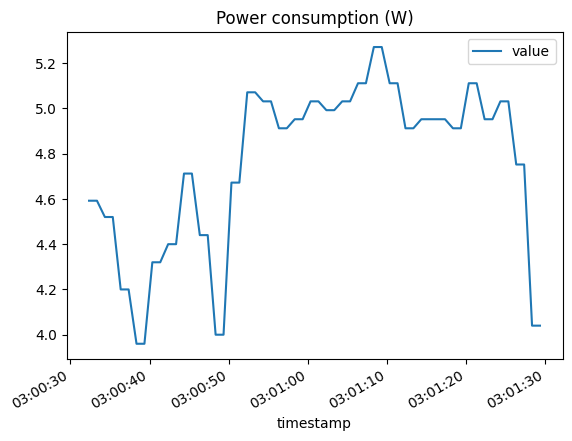

In [ ]:
power_consumption[power_consumption["meta.sensor"] == "vdd_in"].plot(x="timestamp", y="value", title="Power consumption (W)")
# power_consumption[power_consumption["meta.sensor"] == "vdd_in"].describe()

In [ ]:
total_power_consumption = power_consumption[power_consumption["meta.sensor"] == "vdd_in"]
total_power_consumption["total_power_app"] = total_power_consumption["value"] - total_power_consumption["value"].min()

<Axes: title={'center': 'Power consumption by the app(W)'}, xlabel='timestamp'>

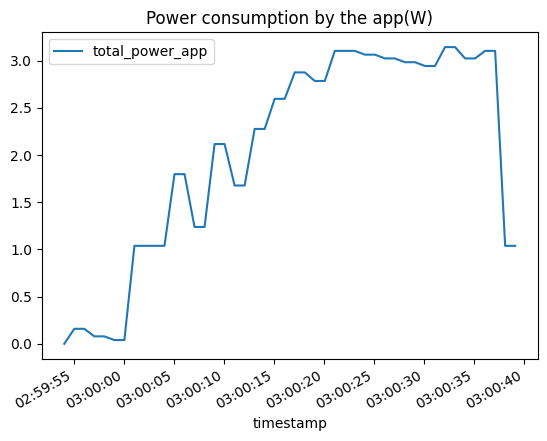

In [ ]:
total_power_consumption.plot(x="timestamp", y="total_power_app", title="Power consumption by the app(W)")

In [ ]:
time_deltas = (total_power_consumption["timestamp"] - total_power_consumption["timestamp"].min()).dt.total_seconds()
integral = simps(total_power_consumption["total_power_app"], time_deltas.to_list())
# grouped = df.groupby("timestamp")[["total_power_app"]].mean()  # Exclude timestamp from aggregation
# # Calculate the integral of total_power_app over time
# timestamps = pd.to_datetime(grouped.index)
# time_deltas = (timestamps - timestamps.min()).total_seconds()
# integral = simps(grouped["total_power_app"], time_deltas)
print(f"Total energy consumption: {integral} J ({integral / 3600} Wh) over {time_deltas.iloc[-1]} seconds")

Total energy consumption: 45.8836917739051 J (0.012745469937195861 Wh) over 57.0 seconds


/tmp/ipykernel_7961/1368809943.py:2: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(total_power_consumption["total_power_app"], time_deltas.to_list())


In [ ]:
memory_consumption = utils.get_node_performance_data(
    vsn=vsn,
    metric="container_memory_working_set_bytes",
    start=workload_instance.timestamp.strftime("%Y-%m-%dT%H:%M:%SZ"),
    end=workload_instance.completed_at.strftime("%Y-%m-%dT%H:%M:%SZ")
)

In [ ]:
memory_consumption["meta.container"].unique()

array(['config-reloader', 'coredns', 'grafana-agent', 'jetson-exporter',
       'local-path-provisioner', 'metrics-server', 'node-exporter',
       'operator', 'wes-app-meta-cache', 'wes-audio-server',
       'wes-data-sharing-service', 'wes-device-labeler', 'wes-factory',
       'wes-gps-server', 'wes-iio-bme280', 'wes-iio-bme680',
       'wes-metrics-agent', 'wes-node-influxdb',
       'wes-node-influxdb-loader', 'wes-plugin-scheduler', 'wes-rabbitmq',
       'wes-raingauge', 'wes-sciencerule-checker', 'wes-scoreboard',
       'wes-upload-agent', 'wildfire-smoke-w0b1node', nan], dtype=object)

In [ ]:
memory_consumption = memory_consumption[memory_consumption["meta.pod"] == "wildfire-smoke-w0b1node-2376"]
memory_consumption = memory_consumption[memory_consumption["meta.container"] == "wildfire-smoke-w0b1node"]

<Axes: title={'center': 'Memory consumption (bytes)'}, xlabel='timestamp'>

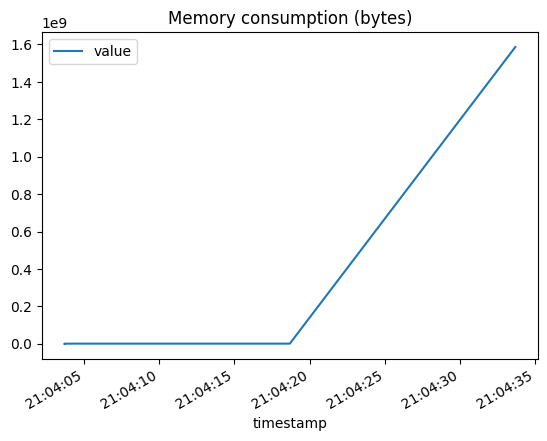

In [ ]:
memory_consumption.plot(x="timestamp", y="value", title="Memory consumption (bytes)")

In [ ]:
vsn = "W0B1"
# This is the time we enabled collecting tegrastats every second
# Before, it was every 10 seconds
start = "2025-03-26T23:35:00Z"
end="2025-03-26T21:59:59Z"

# The workload name can be found in
# https://portal.sagecontinuum.org/jobs/all-jobs?job=2861
workload_name = "wildfire-smoke-test"

In [ ]:
csv_data = pd.read_csv("data/rpistats.backup.csv")
csv_data["timestamp"] = pd.to_datetime(csv_data["timestamp"]*1e9, utc=True)

In [ ]:
csv_data.head()

,timestamp,rpi_power
0,2025-03-27 02:36:32.864999936+00:00,3.71
1,2025-03-27 02:36:34.009999872+00:00,3.71
2,2025-03-27 02:36:35.211000064+00:00,3.64
3,2025-03-27 02:36:36.340000+00:00,3.64
4,2025-03-27 02:36:37.472999936+00:00,3.64


In [ ]:
filtered_data = csv_data[(csv_data['timestamp'] >= workload_instance.timestamp - pd.Timedelta(5, unit="s")) & (csv_data['timestamp'] <= workload_instance.completed_at)]
filtered_data["rpi_power_app"] = filtered_data["rpi_power"] - filtered_data["rpi_power"].min()
filtered_data.head()

,timestamp,rpi_power,rpi_power_app
1191,2025-03-27 02:59:59.936999936+00:00,3.71,0.00
1192,2025-03-27 03:00:01.104000+00:00,3.71,0.00
1193,2025-03-27 03:00:02.229000192+00:00,3.71,0.00
1194,2025-03-27 03:00:03.360000+00:00,4.35,0.64
1195,2025-03-27 03:00:04.576000+00:00,4.35,0.64


<Axes: title={'center': 'Power consumption (W)'}, xlabel='timestamp'>

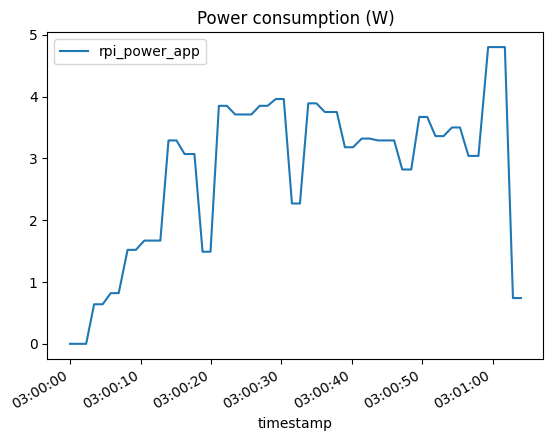

In [ ]:
filtered_data.plot(x="timestamp", y="rpi_power_app", title="Power consumption (W)")

In [ ]:
time_deltas = (filtered_data["timestamp"] - filtered_data["timestamp"].min()).dt.total_seconds()
integral = simps(filtered_data["rpi_power_app"], time_deltas.to_list())
# grouped = df.groupby("timestamp")[["total_power_app"]].mean()  # Exclude timestamp from aggregation
# # Calculate the integral of total_power_app over time
# timestamps = pd.to_datetime(grouped.index)
# time_deltas = (timestamps - timestamps.min()).total_seconds()
# integral = simps(grouped["total_power_app"], time_deltas)
print(f"Total energy consumption: {integral} J ({integral / 3600} Wh) over {time_deltas.iloc[-1]} seconds")

Total energy consumption: 180.3020952572008 J (0.05008391534922244 Wh) over 64.106000128 seconds


/tmp/ipykernel_7961/1684373693.py:2: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(filtered_data["rpi_power_app"], time_deltas.to_list())
